In [34]:
%matplotlib inline
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

import joblib


In [13]:
#streamlit-es importok
import streamlit as st


In [14]:
dataset = pd.read_csv("data.csv")
dataset

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


In [15]:
print(dataset["Interest"].nunique()) #5 fele interest
print(dataset["Personality"].nunique()) # 16 fele personality

5
16


In [16]:
dataset["Gender"] = dataset["Gender"].map({'Female': 1, 'Male': 0})
le = LabelEncoder()
dataset["Interest"] = le.fit_transform(dataset["Interest"])
le_interrest_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_interrest_mapping)
dataset["Personality"] = le.fit_transform(dataset["Personality"])
le_personality_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_personality_mapping)


{'Arts': 0, 'Others': 1, 'Sports': 2, 'Technology': 3, 'Unknown': 4}
{'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [35]:
print(dataset.head())
print(dataset.describe())
total = dataset["Personality"].count()

print("\nNan values:\n")
print(dataset.isnull().sum())

cnt = dataset["Personality"].value_counts().sort_index()
cnt = cnt.reset_index()
cnt.columns = ['personality', 'count']
cnt['%'] = np.round(cnt['count'] / total * 100, 2)
print("\nPercentage of levels:\n")
print(cnt)

    Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0  19.0       0          0             9.47080       7.141434         6.03696   
1  27.0       1          0             5.85392       6.160195         0.80552   
2  21.0       1          0             7.08615       3.388433         2.66188   
3  28.0       0          0             2.01892       4.823624         7.30625   
4  36.0       1          1             9.91703       4.755080         5.31469   

   Judging Score  Interest  Personality  
0       4.360278         4            1  
1       4.221421         2            5  
2       5.127320         4            1  
3       5.986550         1           11  
4       4.677213         3            1  
                 Age         Gender      Education  Introversion Score  \
count  128061.000000  128061.000000  128061.000000       128061.000000   
mean       26.349091       0.450012       0.411156            4.996387   
std         4.908022       0.497497    

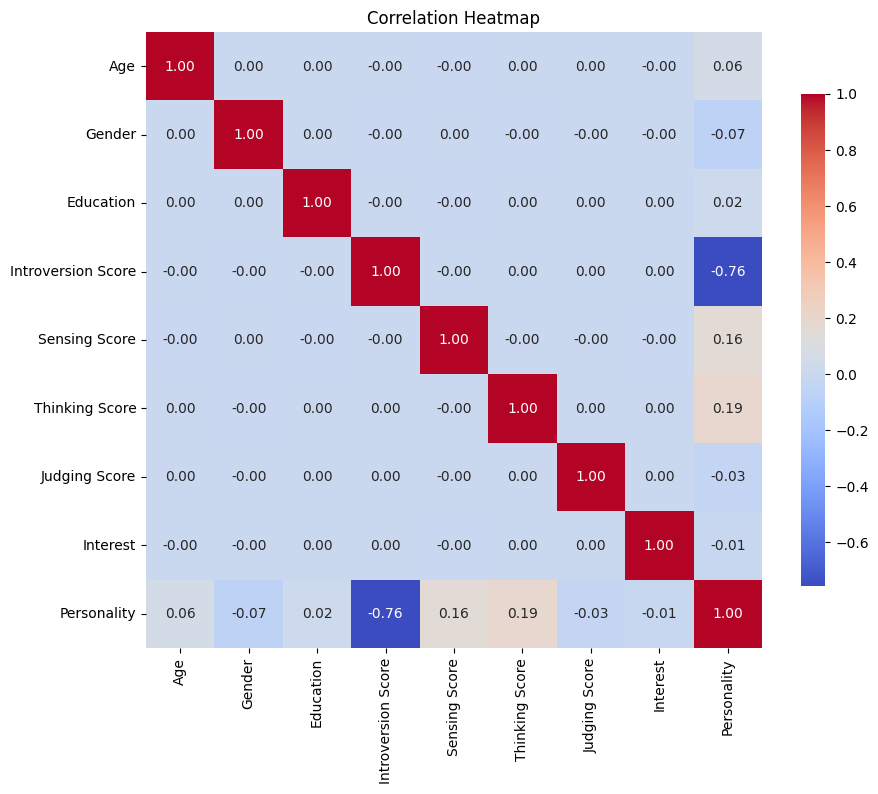

C:\Users\majer\AppData\Local\Temp\ipykernel_9688\1015192460.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=cnt['personality'], y=cnt['count'], palette=palet)


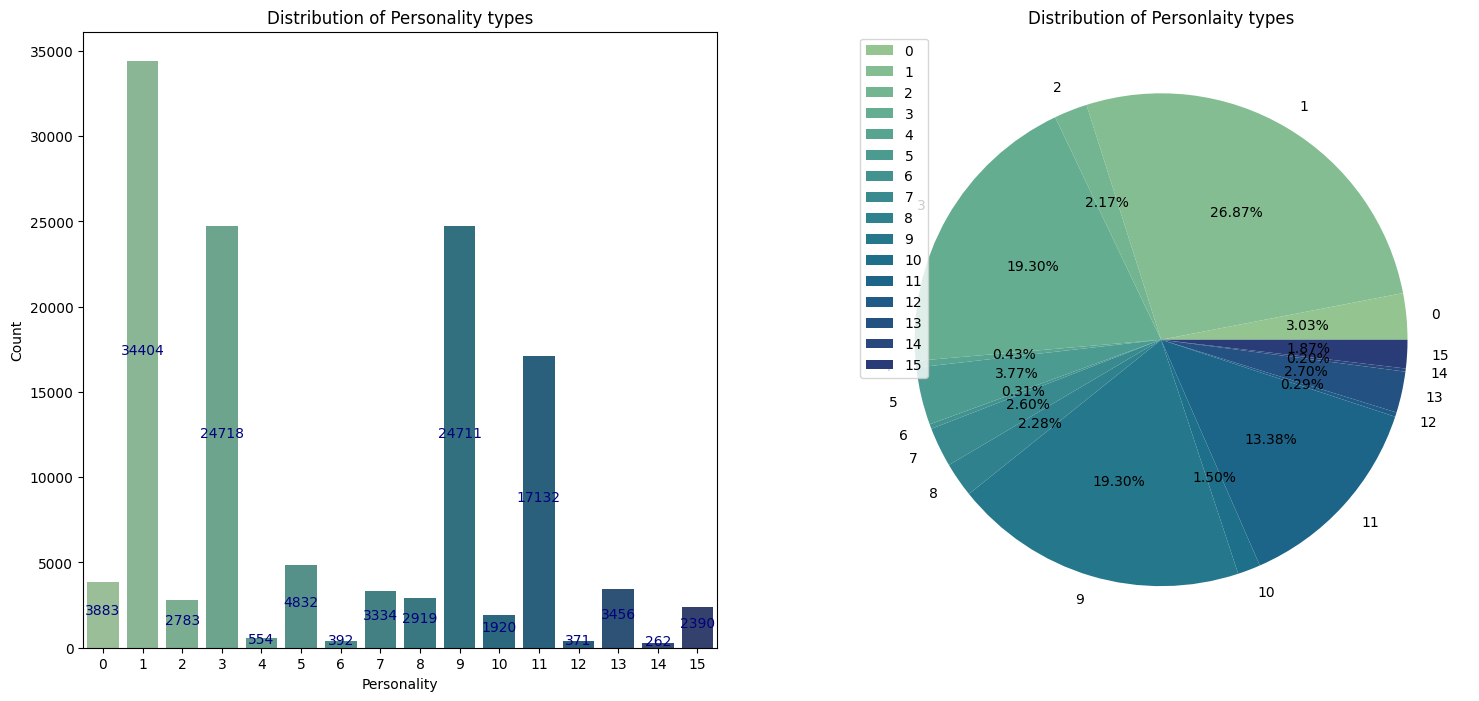

In [40]:
#adat vizualizacio
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()
#adatok eloszlasas
plt.figure(figsize=(18,8))

palet = sns.color_palette("crest", len(cnt['personality']))

plt.subplot(1, 2, 1)
barplot = sns.barplot(x=cnt['personality'], y=cnt['count'], palette=palet)

plt.xlabel('Personality')
plt.ylabel('Count')
plt.title('Distribution of Personality types')


for i, row in cnt.iterrows():
    barplot.text(row.name,row['count']/2, int(round(row['count'],2)), color='navy', ha="center")

plt.subplot(1, 2, 2)
plt.pie(cnt['count'], labels=cnt['personality'], autopct='%1.2f%%', colors=palet)

plt.title('Distribution of Personlaity types')
plt.legend(cnt['personality'])
plt.show()


In [17]:
y = dataset["Personality"]
X = dataset.drop('Personality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.8, random_state= 42)


## tesztuzemkent cnn
## Modell építése
model = Sequential([
    # Dense 1
    Dense(128,activation='relu', input_dim=features.shape[1]),Dropout(0.2),
    # Dense 2
    Dense(64,activation='relu'),Dropout(0.2),
    # Dense 3
    Dense(32,activation='relu'),Dropout(0.2),
    # Dense 4
    Dense(1,activation='linear')
])

# Modell összeállítása
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Pontosság:")
print(accuracy)



Pontosság:
0.9035645961035411


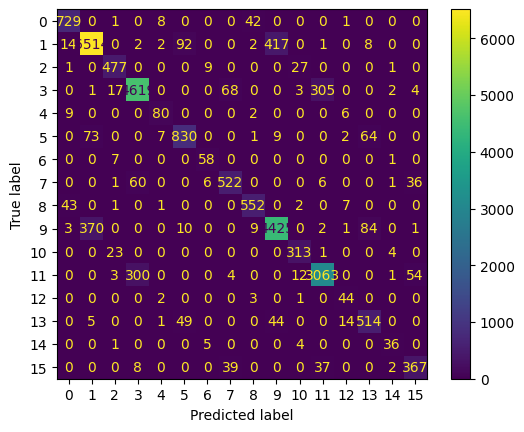

In [41]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = metrics.confusion_matrix(y_pred,y_test)
print("Pontosság:")
print(accuracy)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
cm_display.plot()
plt.show()
